<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Tutorial_caret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Caret

A comprehensive guide into all the possibilities of Max Kuhn's caret can be found at: https://topepo.github.io/caret/

Below, I show a snippet of code coming from the reference material mentioned above (https://topepo.github.io/caret/model-training-and-tuning.html), where some very fundamental applications of caret are demonstrated for estimating a machine learning model. 

Needless to say, there is much, much more to caret than the part shown below. Please do visit https://topepo.github.io/caret/ to get a glimpse of all the possibilities of this important package.

In [1]:
install.packages('mlbench')
install.packages('caret')
install.packages('gbm')
install.packages('e1071')

library(mlbench)
library(caret)
library(gbm)
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice

Loading required package: ggplot2



We start with loading and describing the Sonar dataset, that comes with the mlbench package.

In [3]:
data(Sonar)
str(Sonar[,1:10])
table(Sonar$Class)
head(Sonar)

'data.frame':	208 obs. of  10 variables:
 $ V1 : num  0.02 0.0453 0.0262 0.01 0.0762 0.0286 0.0317 0.0519 0.0223 0.0164 ...
 $ V2 : num  0.0371 0.0523 0.0582 0.0171 0.0666 0.0453 0.0956 0.0548 0.0375 0.0173 ...
 $ V3 : num  0.0428 0.0843 0.1099 0.0623 0.0481 ...
 $ V4 : num  0.0207 0.0689 0.1083 0.0205 0.0394 ...
 $ V5 : num  0.0954 0.1183 0.0974 0.0205 0.059 ...
 $ V6 : num  0.0986 0.2583 0.228 0.0368 0.0649 ...
 $ V7 : num  0.154 0.216 0.243 0.11 0.121 ...
 $ V8 : num  0.16 0.348 0.377 0.128 0.247 ...
 $ V9 : num  0.3109 0.3337 0.5598 0.0598 0.3564 ...
 $ V10: num  0.211 0.287 0.619 0.126 0.446 ...



  M   R 
111  97 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,⋯,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,⋯,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,⋯,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,⋯,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
5,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,⋯,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
6,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,⋯,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


## Data Splitting
When doing your own project, you will by far spend most of your time exploring and preparing your data, before you get to the modelling of your data. We skip exploring and preparing your data and go straight to modelling in this example.

The first part of the modelling workflow is to split your data into a training and testing dataset, such that the training dataset can be used to assess different model choices, and the testing set can be used to evaluate the performance of the final model.

Splitting can be done in multiple ways, e.g. at random, stratified, across time. Below is an example of random splitting, where every observation has a 75% chance of being assigned to the training set. 

Caret's built-in function createDataPartition requires the outcome variable as input, and uses that outcome to guarantee that the distribution of your outcome variable (whether it is categorical or numeric) is comparable in your training and testing dataset.

Furthermore, this data splitting command is preceded by the set.seed() command, which ensures that the same 'randomness' is applied, every time the data is being split in this way (i.e. ensuring that you replicate your findings each time you run this code).

Make it a habit (for the sake of replicability) to use the set.seed() command before any analysis that incorparates a component of randomness.

In [8]:
#data splitting
set.seed(998)
inTraining <- createDataPartition(Sonar$Class, p = 0.75, list = FALSE)
class(inTraining)
training <- Sonar[inTraining,]
testing <- Sonar[-inTraining,]

print('Occurrence of outcomes M and R')
table(Sonar$Class)

print(paste('occurrence of outcome M in full data set:   ',sum(Sonar['Class']=='M')/length(Sonar$Class)*100,'%'))
print(paste('occurrence of outcome M in the training set:',sum(training['Class']=='M')/length(training$Class)*100,'%'))
print(paste('occurrence of outcome M in the testing set: ',sum(testing['Class']=='M')/length(testing$Class)*100,'%'))

[1] "matrix" "array"

[1] "Occurrence of outcomes M and R"



  M   R 
111  97 

[1] "occurrence of outcome M in full data set:    53.3653846153846 %"
[1] "occurrence of outcome M in the training set: 53.5031847133758 %"
[1] "occurrence of outcome M in the testing set:  52.9411764705882 %"


## Part I: Defining validation method
The code used for estimating and evaluating machine learning models using caret always comes in three parts. The first part consists of defining the validation method used to assess the performance of the different models within the training dataset. The second part consists of indicating what data and what model to use (along with a number of additional options, such as what metric to use for deciding what the optimal model is). The third part consists of evaluating the results.

The first part of the code uses the function trainControl and defines the method of validation, which is often set to repeated cross-validation. Repeated cross validation further requires the specification of the number of folds (number: usually 5 or 10), and the number of repeats. This function is stored into an object, in this instance called fitControl, such that this object can be referred to in the second part of the code.

In [9]:
fitControl <- trainControl(## 10-fold CV
        method = "repeatedcv",
        number = 10,
        ## repeated ten times
        repeats = 3)

##Part II: Training the model
The second part defines which outcome to classify or predict using which predictors, the table where this data can be found (data), and the type of machine learning algorithm which is to be applied (method). Furthermore, the validation method is set by referring to the object defined in part I. See what happens when you remove the verbose = FALSE option).

In [15]:
# train model (GBM)
set.seed(825)
gbmFit1 <- train(Class ~ ., data = training, 
                 method = "gbm", 
                 trControl = fitControl,
                 verbose = FALSE)
gbmFit1

Stochastic Gradient Boosting 

157 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 141, 142, 141, 142, 141, 142, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0.7939461  0.5802124
  1                  100      0.8155801  0.6260616
  1                  150      0.8300572  0.6541376
  2                   50      0.8045016  0.6029198
  2                  100      0.8427124  0.6810764
  2                  150      0.8257680  0.6466368
  3                   50      0.8125899  0.6188960
  3                  100      0.8277288  0.6495926
  3                  150      0.8261683  0.6471937

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
The final values used

In addition, a user-defined grid can be used to investigate the performance using alternative hyperparameter values.

In [16]:
# user-defined tuning grid
gbmGrid <-  expand.grid(interaction.depth = c(1, 2), 
                        n.trees = (1:10)*50, 
                        shrinkage = 0.1,
                        n.minobsinnode = 20)

nrow(gbmGrid)

set.seed(825)
gbmFit2 <- train(Class ~ ., data = training, 
                 method = "gbm", 
                 trControl = fitControl, 
                 verbose = FALSE, 
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = gbmGrid)
gbmFit2

[1] 20

Stochastic Gradient Boosting 

157 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 141, 142, 141, 142, 141, 142, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0.7752859  0.5449620
  1                  100      0.8069526  0.6088502
  1                  150      0.8235294  0.6420284
  1                  200      0.8317239  0.6591132
  1                  250      0.8402124  0.6761688
  1                  300      0.8190850  0.6337761
  1                  350      0.8149183  0.6251233
  1                  400      0.8300572  0.6551400
  1                  450      0.8233905  0.6423213
  1                  500      0.8236683  0.6434675
  2                   50      0.8001961  0.5950402
  2                  100      0.8381291  0.6722523
  2                  150      0.8367239  0.6682053
  2                  200

##Part III: Evaluating Results
After estimating a model using caret's train function, there are multiple ways to evaluate the results. Straightforward ways are to plot the results using plot(), to show the importance of the different predictors using varImp, and (in case of a binary outcome) to use the confusion matrix.

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 23  4
         R  4 20
                                          
               Accuracy : 0.8431          
                 95% CI : (0.7141, 0.9298)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 2.534e-06       
                                          
                  Kappa : 0.6852          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8519          
            Specificity : 0.8333          
         Pos Pred Value : 0.8519          
         Neg Pred Value : 0.8333          
             Prevalence : 0.5294          
         Detection Rate : 0.4510          
   Detection Prevalence : 0.5294          
      Balanced Accuracy : 0.8426          
                                          
       'Positive' Class : M               
                                    

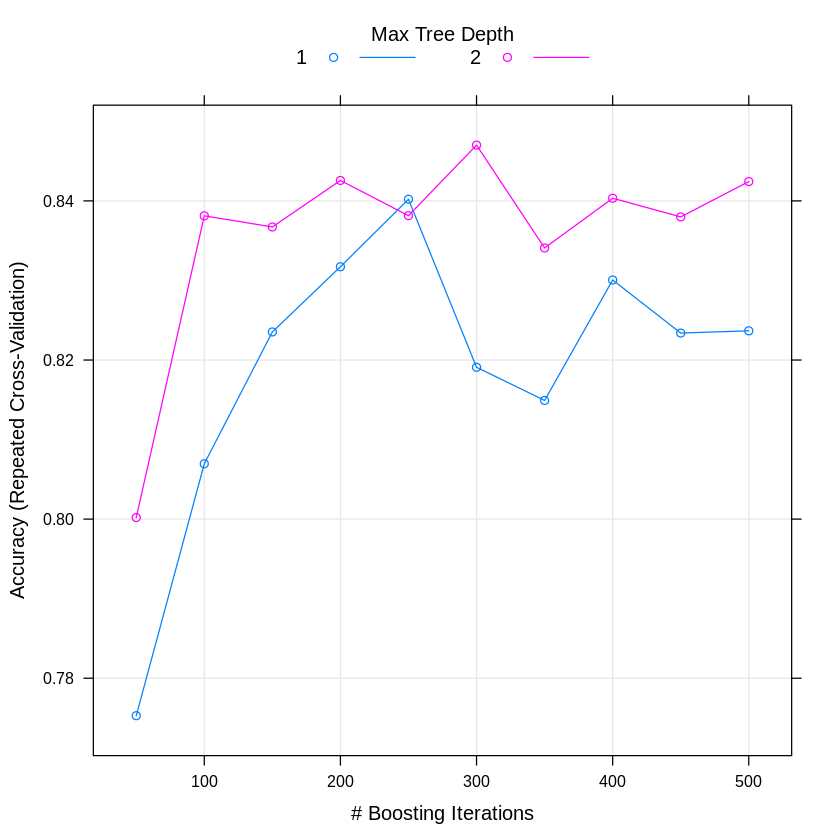

In [19]:
plot(gbmFit2)
confusionMatrix(predict(gbmFit2, testing), testing$Class)

gbm variable importance

  only 20 most important variables shown (out of 60)

    Overall
V12 100.000
V11  56.274
V27  32.374
V36  31.279
V51  27.695
V52  22.333
V23  18.857
V9   18.377
V31  17.713
V5   13.406
V45  11.458
V47  11.127
V17  10.996
V4   10.933
V46  10.664
V37  10.191
V43   9.817
V39   8.450
V44   8.386
V1    8.316

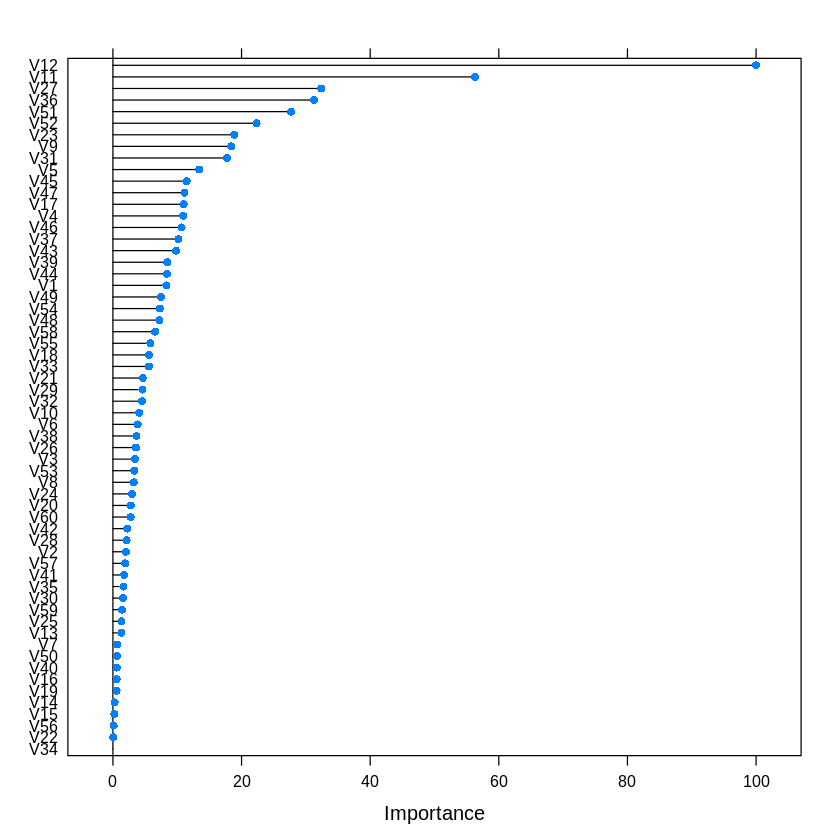

In [20]:
# variable importance
varImp(gbmFit2)
plot(varImp(gbmFit2))